**ACCIDENT SEVERITY PREDICTION USING ENSEMBLE LEARNING**

**Lab Overview**

**About the Dataset**
The Road accident dataset which contains

1. Classes -3
2. Samples total - 12316
3. Dimensionality - 31

**PROBLEM STATMENT**
Given a dataset of past traffic accidents, the goal is to predict the severity of future accidents. The severity can be classified into three levels, such as Slight Injury,Serious Injury,Fatal injury. The prediction can help authorities take preventive measures to minimize the likelihood and impact of future accidents, such as improving road infrastructure, enforcing traffic rules, and raising public awareness.

**Dataset**
The link of the dataset is given:

https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

**LOADING THE DATASET**

In [ ]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/content/RTA Dataset.csv',na_values=['na'])


**DATA DESCRIPTION**

**Displaying the first 5 rows of the data.**

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**Printing the information of the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         8998 non-null   object 
 1   Day_of_week                  8998 non-null   object 
 2   Age_band_of_driver           8998 non-null   object 
 3   Sex_of_driver                8998 non-null   object 
 4   Educational_level            8477 non-null   object 
 5   Vehicle_driver_relation      8621 non-null   object 
 6   Driving_experience           8400 non-null   object 
 7   Type_of_vehicle              8283 non-null   object 
 8   Owner_of_vehicle             8647 non-null   object 
 9   Service_year_of_vehicle      6041 non-null   object 
 10  Defect_of_vehicle            5710 non-null   object 
 11  Area_accident_occured        8822 non-null   object 
 12  Lanes_or_Medians             8702 non-null   object 
 13  Road_allignment   

**Description of the data**

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity
count,8997.000000,8997.000000,5811.000000
mean,2.018673,1.522952,2.889348
std,0.641743,1.004022,0.327682
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000
50%,2.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000
max,7.000000,8.000000,3.000000


**The shape.**

In [ ]:
df.shape

(8998, 32)

**Details of the null values in the datset.**

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               521
Vehicle_driver_relation         377
Driving_experience              598
Type_of_vehicle                 715
Owner_of_vehicle                351
Service_year_of_vehicle        2957
Defect_of_vehicle              3288
Area_accident_occured           176
Lanes_or_Medians                296
Road_allignment                 114
Types_of_Junction                 1
Road_surface_type               127
Road_surface_conditions           1
Light_conditions                  1
Weather_conditions                1
Type_of_collision               106
Number_of_vehicles_involved       1
Number_of_casualties              1
Vehicle_movement                211
Casualty_class                 3187
Sex_of_casualty                3187
Age_band_of_casualty           3187
Casualty_severity              3187
Work_of_casuality           

**Dropping columns**

In [ ]:
df.drop(['Defect_of_vehicle','Service_year_of_vehicle','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Work_of_casuality','Fitness_of_casuality','Casualty_severity','Time'], axis=1,inplace=True)

**Handelling Null Values**

In [ ]:
df.isnull().sum()

Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              521
Vehicle_driver_relation        377
Driving_experience             598
Type_of_vehicle                715
Owner_of_vehicle               351
Area_accident_occured          176
Lanes_or_Medians               296
Road_allignment                114
Types_of_Junction                1
Road_surface_type              127
Road_surface_conditions          1
Light_conditions                 1
Weather_conditions               1
Type_of_collision              106
Number_of_vehicles_involved      1
Number_of_casualties             1
Vehicle_movement               211
Pedestrian_movement              1
Cause_of_accident                1
Accident_severity                1
dtype: int64

**Imputing Mean and Mode handling null values**

In [ ]:
#storing all the categorical variable in categorical.
categorical = [i for i in df.columns if df[i].dtype =='object']
num_vari = len(categorical)
print('The categorical variables are:',categorical)
print('The categorical variables are:',num_vari)

The categorical variables are: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
The categorical variables are: 21


In [ ]:
for i in categorical:
    print(df[i].value_counts())

Friday       1446
Thursday     1402
Wednesday    1373
Tuesday      1293
Monday       1249
Saturday     1227
Sunday       1008
Name: Day_of_week, dtype: int64
18-30       3037
31-50       2957
Unknown     1365
Over 51     1045
Under 18     594
Name: Age_band_of_driver, dtype: int64
Male       8319
Female      508
Unknown     171
Name: Sex_of_driver, dtype: int64
Junior high school    5554
Elementary school     1598
High school            827
Above high school      247
Writing & reading      145
Unknown                 71
Illiterate              35
Name: Educational_level, dtype: int64
Employee    6994
Owner       1524
Other         89
Unknown       14
Name: Vehicle_driver_relation, dtype: int64
5-10yr        2480
2-5yr         1888
Above 10yr    1665
1-2yr         1266
Below 1yr      987
No Licence      87
unknown         27
Name: Driving_experience, dtype: int64
Automobile              2352
Lorry (41?100Q)         1594
Other                    884
Pick up upto 10Q         588
Public (1

In [ ]:
#filling the categorical null values of the categorical using mode the values.
for i in categorical:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
mean_value = df["Number_of_vehicles_involved"].mean()
df["Number_of_vehicles_involved"] = df["Number_of_vehicles_involved"].fillna(mean_value)

In [ ]:
mean = df["Number_of_casualties"].mean()
df["Number_of_casualties"]=df["Number_of_casualties"].fillna(mean)

In [ ]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

**Inference:** There are no null values.

**Feature Selection**

Since there are many categorical variable we apply X^2 freature selection method.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
#creating new data frame
df1 = pd.DataFrame()

In [ ]:
for i in categorical:
  if i!= 'Accident_severity':
    df1[i]=le.fit_transform(df[i])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              8998 non-null   int64
 1   Age_band_of_driver       8998 non-null   int64
 2   Sex_of_driver            8998 non-null   int64
 3   Educational_level        8998 non-null   int64
 4   Vehicle_driver_relation  8998 non-null   int64
 5   Driving_experience       8998 non-null   int64
 6   Type_of_vehicle          8998 non-null   int64
 7   Owner_of_vehicle         8998 non-null   int64
 8   Area_accident_occured    8998 non-null   int64
 9   Lanes_or_Medians         8998 non-null   int64
 10  Road_allignment          8998 non-null   int64
 11  Types_of_Junction        8998 non-null   int64
 12  Road_surface_type        8998 non-null   int64
 13  Road_surface_conditions  8998 non-null   int64
 14  Light_conditions         8998 non-null   int64
 15  Weat

In [ ]:
#label encoded data set
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,5,1,0,0,3,2,3,2,5,9
1,1,1,1,4,0,3,11,3,6,4,5,1,0,0,3,2,8,2,5,16
2,1,0,1,4,0,0,5,3,1,6,5,1,0,0,3,2,2,2,5,0
3,3,0,1,4,0,2,11,0,6,6,6,7,2,0,0,2,8,2,5,1
4,3,0,1,4,0,1,0,3,4,6,5,7,0,0,0,2,8,2,5,16


In [ ]:
# Apply chi-square feature selection and select the top K features
from sklearn.feature_selection import chi2, SelectKBest
K = 10
selector = SelectKBest(chi2, k=K)
selector.fit(df1, df['Accident_severity'])

SelectKBest(score_func=<function chi2 at 0x7f794f406af0>)

In [ ]:
# Get the p-values of the features
p_values = selector.pvalues_

In [ ]:
# Set the significance level (alpha)
alpha = 0.05

In [ ]:
# Get the indices of the features that have a p-value less than alpha
significant_indices = [i for i, p in enumerate(p_values) if p < alpha]

In [ ]:
# Get the names of the top K features
top_K_features = df1.columns[selector.get_support(indices=True)]

In [ ]:
# Select the top K features from the dataset
X_selected = df1[top_K_features]

In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age_band_of_driver       8998 non-null   int64
 1   Vehicle_driver_relation  8998 non-null   int64
 2   Driving_experience       8998 non-null   int64
 3   Type_of_vehicle          8998 non-null   int64
 4   Road_surface_type        8998 non-null   int64
 5   Light_conditions         8998 non-null   int64
 6   Weather_conditions       8998 non-null   int64
 7   Type_of_collision        8998 non-null   int64
 8   Vehicle_movement         8998 non-null   int64
 9   Cause_of_accident        8998 non-null   int64
dtypes: int64(10)
memory usage: 703.1 KB


**`Inference:`** From above table we need those features which have high F-statistic value and low P-value. We remove the lowest F-statistic values.

In [ ]:
df1 = df.drop(["Day_of_week","Sex_of_driver","Educational_level","Type_of_vehicle","Owner_of_vehicle","Road_allignment","Road_surface_type","Road_surface_conditions","Weather_conditions","Vehicle_movement","Pedestrian_movement"],axis=1)

In [ ]:
df1.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Daylight,Collision with roadside-parked vehicles,2.0,2.0,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Daylight,Vehicle with vehicle collision,2.0,2.0,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Daylight,Collision with roadside objects,2.0,2.0,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2.0,2.0,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2.0,2.0,Overtaking,Slight Injury


In [ ]:
df1.shape

(8998, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age_band_of_driver           8998 non-null   object 
 1   Vehicle_driver_relation      8998 non-null   object 
 2   Driving_experience           8998 non-null   object 
 3   Area_accident_occured        8998 non-null   object 
 4   Lanes_or_Medians             8998 non-null   object 
 5   Types_of_Junction            8998 non-null   object 
 6   Light_conditions             8998 non-null   object 
 7   Type_of_collision            8998 non-null   object 
 8   Number_of_vehicles_involved  8998 non-null   float64
 9   Number_of_casualties         8998 non-null   float64
 10  Cause_of_accident            8998 non-null   object 
 11  Accident_severity            8998 non-null   object 
dtypes: float64(2), object(10)
memory usage: 843.7+ KB


In [ ]:
categorical_df1 = [i for i in df1.columns if df1[i].dtype =='object']
number = len(categorical_df1)
print("the number of column",number)
print("the number of column",categorical_df1)

the number of column 10
the number of column ['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Light_conditions', 'Type_of_collision', 'Cause_of_accident', 'Accident_severity']


In [ ]:
for i in categorical_df1:
  print(df1[i].value_counts())

18-30       3037
31-50       2957
Unknown     1365
Over 51     1045
Under 18     594
Name: Age_band_of_driver, dtype: int64
Employee    7371
Owner       1524
Other         89
Unknown       14
Name: Vehicle_driver_relation, dtype: int64
5-10yr        3078
2-5yr         1888
Above 10yr    1665
1-2yr         1266
Below 1yr      987
No Licence      87
unknown         27
Name: Driving_experience, dtype: int64
Other                              2950
Office areas                       2531
Residential areas                  1487
 Church areas                       772
 Industrial areas                   353
School areas                        288
  Recreational areas                241
 Outside rural areas                169
 Hospital areas                      92
  Market areas                       48
Rural village areas                  36
Unknown                              18
Rural village areasOffice areas      12
Recreational areas                    1
Name: Area_accident_occured, dty

**Inference:** Here there some values in the column which is denoted as unknown.Remove the unknown values.

In [ ]:
df1.isnull().sum()

Age_band_of_driver             0
Vehicle_driver_relation        0
Driving_experience             0
Area_accident_occured          0
Lanes_or_Medians               0
Types_of_Junction              0
Light_conditions               0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Cause_of_accident              0
Accident_severity              0
dtype: int64

**FEATURE ENGINEERING**

Imputing those unknown and Unknown values using mode.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values='unknown', strategy='most_frequent')
imp.fit(df1)
df2=imp.transform(df1)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values ="Unknown",strategy="most_frequent")
imp.fit(df2)
df3 = imp.transform(df2)

In [ ]:
df3 = pd.DataFrame(df3, columns=df1.columns)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           8998 non-null   object
 1   Vehicle_driver_relation      8998 non-null   object
 2   Driving_experience           8998 non-null   object
 3   Area_accident_occured        8998 non-null   object
 4   Lanes_or_Medians             8998 non-null   object
 5   Types_of_Junction            8998 non-null   object
 6   Light_conditions             8998 non-null   object
 7   Type_of_collision            8998 non-null   object
 8   Number_of_vehicles_involved  8998 non-null   object
 9   Number_of_casualties         8998 non-null   object
 10  Cause_of_accident            8998 non-null   object
 11  Accident_severity            8998 non-null   object
dtypes: object(12)
memory usage: 843.7+ KB


In [ ]:
for i in df3:
  print(df3[i].value_counts())

18-30       4402
31-50       2957
Over 51     1045
Under 18     594
Name: Age_band_of_driver, dtype: int64
Employee    7385
Owner       1524
Other         89
Name: Vehicle_driver_relation, dtype: int64
5-10yr        3105
2-5yr         1888
Above 10yr    1665
1-2yr         1266
Below 1yr      987
No Licence      87
Name: Driving_experience, dtype: int64
Other                              2968
Office areas                       2531
Residential areas                  1487
 Church areas                       772
 Industrial areas                   353
School areas                        288
  Recreational areas                241
 Outside rural areas                169
 Hospital areas                      92
  Market areas                       48
Rural village areas                  36
Rural village areasOffice areas      12
Recreational areas                    1
Name: Area_accident_occured, dtype: int64
Two-way (divided with broken lines road marking)    3525
Undivided Two way         

**Inference:** Here from the dataset we have removed the rows called unknown.

**Handling Categorical values**

Handling categorical values using one-hot encoding.

In [ ]:
df3["Number_of_vehicles_involved"] = df3["Number_of_vehicles_involved"].astype(int)
df3["Number_of_casualties"]=df3["Number_of_casualties"].astype(int)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           8998 non-null   object
 1   Vehicle_driver_relation      8998 non-null   object
 2   Driving_experience           8998 non-null   object
 3   Area_accident_occured        8998 non-null   object
 4   Lanes_or_Medians             8998 non-null   object
 5   Types_of_Junction            8998 non-null   object
 6   Light_conditions             8998 non-null   object
 7   Type_of_collision            8998 non-null   object
 8   Number_of_vehicles_involved  8998 non-null   int64 
 9   Number_of_casualties         8998 non-null   int64 
 10  Cause_of_accident            8998 non-null   object
 11  Accident_severity            8998 non-null   object
dtypes: int64(2), object(10)
memory usage: 843.7+ KB


Using one-hot encoding to convert the dataset into numericals.

In [ ]:
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Daylight,Collision with roadside-parked vehicles,2,2,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Daylight,Vehicle with vehicle collision,2,2,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Daylight,Collision with roadside objects,2,2,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2,2,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2,2,Overtaking,Slight Injury


In [ ]:
#get_dummies
dummy=pd.get_dummies(df3[['Age_band_of_driver','Driving_experience','Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction',
                          'Light_conditions','Type_of_collision',
                            'Cause_of_accident','Vehicle_driver_relation']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,...,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#concatinate dummy and old data frame
df4=pd.concat([df3,dummy],axis=1)
df4.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,...,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Daylight,Collision with roadside-parked vehicles,2,2,...,0,0,0,0,0,0,0,0,0,0
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Daylight,Vehicle with vehicle collision,2,2,...,0,0,0,0,0,1,0,0,0,0
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Daylight,Collision with roadside objects,2,2,...,0,0,0,0,0,0,0,0,0,0
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2,2,...,0,0,0,0,0,0,0,0,0,0
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Darkness - lights lit,Vehicle with vehicle collision,2,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#dropping dummied columns
df4.drop(['Age_band_of_driver', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction','Light_conditions','Type_of_collision','Cause_of_accident','Vehicle_driver_relation'],axis=1,inplace=True)
df4.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,...,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner
0,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Slight Injury,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2,Serious Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,Slight Injury,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x=df4.drop(['Accident_severity'],axis=1)
x.shape

(8998, 64)

In [ ]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,...,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y=df4.iloc[:,2]
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

In [ ]:
#checking the count of each item in the output column
y.value_counts()

Slight Injury     7730
Serious Injury    1179
Fatal injury        89
Name: Accident_severity, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

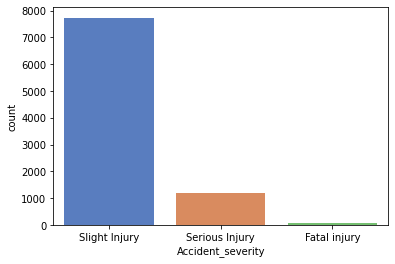

In [ ]:
#plotting count plot using seaborn
sns.countplot(x = y, palette='muted')

**Inference:** There is imbalance in the target values treating them using oversampling method.

**Oversampling**

SMOTE (Synthetic Minority Over-sampling Technique) is a commonly used oversampling technique for imbalanced datasets. It generates synthetic samples for the minority class by interpolating between the feature vectors of the minority class samples.

In [ ]:
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [ ]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

Accident_severity
Fatal injury         7730
Serious Injury       7730
Slight Injury        7730
dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

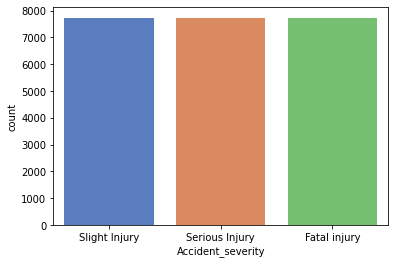

In [ ]:
#plotting count plot using seaborn
sns.countplot(x = yo, palette='muted')

**Inference:** The target variables  is balanced.

**SPLITTING THE DATASET**

In [ ]:
#converting data to training data and testing data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
#splitting 70% of the data to training data and 25% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.25,random_state=42)

**RANDOM FOREST CLASSIFIER**

Random Forest Classifier is a machine learning algorithm that is used for classification tasks. It is an ensemble learning method that builds multiple decision trees and combines them to make a final prediction.
In a random forest classifier, each decision tree is built independently using a randomly sampled subset of the training data and a randomly selected subset of the features. This randomness helps to reduce the variance and overfitting problems associated with decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

**BAGGING CLASSIFIERS**
In Random Forest Classifier, bagging (Bootstrap Aggregating) is used to build multiple decision trees on different subsets of the training data. Bagging is a technique where multiple random subsets of the training data are created by sampling with replacement. Each subset is used to train a decision tree model. These models are then combined using an ensemble method to improve the accuracy and robustness of the classification model.

In [ ]:
# Initialize the bagging classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,VotingClassifier
rf_bag = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)

**AdaBosting Classifiers**

AdaBoost (Adaptive Boosting) is another ensemble learning technique that is commonly used with decision trees in Random Forest Classifier. AdaBoost is a meta-algorithm that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner.

In [ ]:
rf_ada = AdaBoostClassifier(estimator=rf, n_estimators=10, random_state=42)

In [ ]:
vc = VotingClassifier(estimators=[('rf_bag',rf_bag),("rf_ada",rf_ada)], voting='hard')

**FITTING THE MODEL AND PREDICTING**

In [ ]:
rf.fit(x_train, y_train)
predA = rf.predict(x_test)

**FITTING THE MODEL AND PREDICTING THE BAGGING CLASSIFIERS**

In [ ]:
rf_bag.fit(x_train,y_train)
pred_bag = rf_bag.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**FITTING THE MODEL AND PREDICTING THE BOOSTING CLASSIFIERS**

In [ ]:
rf_ada.fit(x_train,y_train)
pred_ada = rf_ada.predict(x_test)

**ACCURACY OF THE MODEL**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy of the Random Forest: ",accuracy_score(y_test,predA))

Accuracy of the Random Forest:  0.9084166954122112


In [ ]:
cm = confusion_matrix(y_test,predA)
print(cm)

[[1948    3   11]
 [  15 1709  172]
 [  10  320 1610]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predA))

                precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      1962
Serious Injury       0.84      0.90      0.87      1896
 Slight Injury       0.90      0.83      0.86      1940

      accuracy                           0.91      5798
     macro avg       0.91      0.91      0.91      5798
  weighted avg       0.91      0.91      0.91      5798



**ACCURACY OF THE BAGGING CLASSIFIERS**

In [ ]:
print("Accuracy using bagging with hard voting: ",accuracy_score(y_test,pred_bag))

Accuracy using bagging with hard voting:  0.905829596412556


In [ ]:
cm = confusion_matrix(y_test,pred_bag)
print(cm)

[[1948    1   13]
 [  19 1726  151]
 [  11  351 1578]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_bag))

                precision    recall  f1-score   support

  Fatal injury       0.98      0.99      0.99      1962
Serious Injury       0.83      0.91      0.87      1896
 Slight Injury       0.91      0.81      0.86      1940

      accuracy                           0.91      5798
     macro avg       0.91      0.91      0.90      5798
  weighted avg       0.91      0.91      0.91      5798



**ACCURACY OF THE ADABOOSTING CLASSIFIERS**

In [ ]:
print("Accuracy using adaboosting with hard voting: ",accuracy_score(y_test,pred_ada))

Accuracy using adaboosting with hard voting:  0.9139358399448085


In [ ]:
cm = confusion_matrix(y_test,pred_ada)
print(cm)

[[1942    2   18]
 [  15 1736  145]
 [   7  312 1621]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_ada))

                precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      1962
Serious Injury       0.85      0.92      0.88      1896
 Slight Injury       0.91      0.84      0.87      1940

      accuracy                           0.91      5798
     macro avg       0.91      0.91      0.91      5798
  weighted avg       0.92      0.91      0.91      5798



**ACCURACY OF THE ENSEMBLED MODEL**

In [ ]:
vc.fit(x_train, y_train)
print("Accuracy using adaboosting with hard voting: ",(vc.score(x_test,y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy using adaboosting with hard voting:  0.9015177647464643


**Decision tree**

A decision tree is a type of machine learning algorithm that is commonly used for both classification and regression tasks. It is a hierarchical model that consists of nodes and edges, where each node represents a decision or a feature, and each edge represents the outcome or the path to follow based on that decision.
The tree is built by recursively partitioning the data into smaller subsets based on the value of a specific feature or attribute, until a stopping criterion is met. The decision at each node is made based on a certain criterion, such as information gain, Gini index or entropy, which determines the best feature to split the data at that node.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
clf = DecisionTreeClassifier()
# Train the classifier on the training data
clf.fit(x_train, y_train)
predc = clf.predict(x_test)

In [ ]:
clf_bag = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=42)
clf_bag.fit(x_train,y_train)
pred_clf_bag = clf_bag.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
clf_ada = AdaBoostClassifier(estimator=clf, n_estimators=10, random_state=42,algorithm='SAMME')
clf_ada.fit(x_train,y_train)
pred_clf_ada = clf_ada.predict(x_test)

In [ ]:
vc_clf = VotingClassifier(estimators=[('clf_bag',clf_bag),("clf_ada",clf_ada)], voting='hard')

**Accuracy of the Model**

In [ ]:
# Evaluate the performance of the SVM on the testing set
print("Accuracy with the model: ",accuracy_score(y_test,predc))

Accuracy with the model:  0.8644360124180752


In [ ]:
# Evaluate the performance of the SVM on the testing set
print("Accuracy with the bagging: ",accuracy_score(y_test,pred_clf_bag))

Accuracy with the bagging:  0.8763366678164884


In [ ]:
# Evaluate the performance of the SVM on the testing set
print("Accuracy with the bagging: ",accuracy_score(y_test,pred_clf_ada))

Accuracy with the bagging:  0.8915143152811315


In [ ]:
vc_clf.fit(x_train, y_train)
print("Accuracy using adaboosting with hard voting: ",(vc_clf.score(x_test,y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy using adaboosting with hard voting:  0.8625388064849948


**INFERENCE:**

Accuracy of the model is 0.88 without using bagging and bosting techniques using logistic regression. Using bagging technique the